## Import the Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

## Prepare the Dataset

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1 / 255.,
    zoom_range = 0.1,
    shear_range = 0.1,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale=1/255.)

In [3]:
train_dataset = train_datagen.flow_from_directory(
    r'C:\Users\aksha\Downloads\archive (16)\train',
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical',
    shuffle = True
)

valid_dataset = valid_datagen.flow_from_directory(
    r'C:\Users\aksha\Downloads\archive (16)\test',
    target_size = (48, 48),
    batch_size = 32,
    color_mode = 'grayscale',
    class_mode = 'categorical',
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Define the Model

In [4]:
inputs = tf.keras.Input(shape=(48, 48, 1))
x = Conv2D(32, 3, activation='relu', padding='same')(inputs)
x = MaxPool2D()(inputs)
x = Conv2D(64, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Conv2D(128, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Conv2D(256, 3, activation='relu', padding='same')(x)
x = MaxPool2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(7, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)

In [5]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.3)

## Train the Model

In [6]:
history = model.fit(train_dataset, validation_data=valid_dataset, epochs=40, callbacks=[learning_rate])

model.save('emotion_recognition_model.h5')

Epoch 1/40


C:\Users\aksha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.2478 - loss: 1.8120 - val_accuracy: 0.3100 - val_loss: 1.7177 - learning_rate: 0.0010
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.3357 - loss: 1.6785 - val_accuracy: 0.3994 - val_loss: 1.5527 - learning_rate: 0.0010
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.3894 - loss: 1.5624 - val_accuracy: 0.4277 - val_loss: 1.4855 - learning_rate: 0.0010
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.4090 - loss: 1.5142 - val_accuracy: 0.4348 - val_loss: 1.4583 - learning_rate: 0.0010
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.4338 - loss: 1.4690 - val_accuracy: 0.4667 - val_loss: 1.3980 - learning_rate: 0.0010
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.4395 - loss: 1.4459 - val_accuracy: 0.4578 - val_loss: 1.3875 - learning_rate: 0.0010
Epoch 7/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.4540 - loss: 1.4025

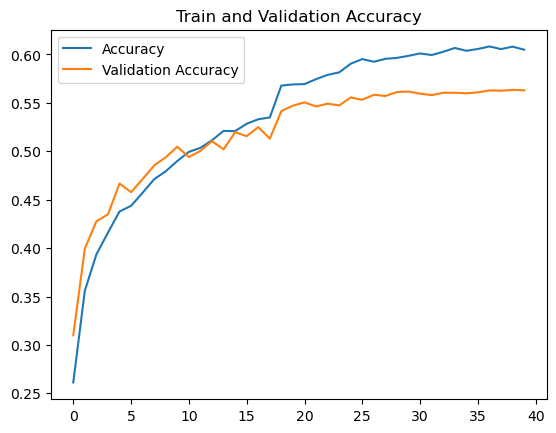

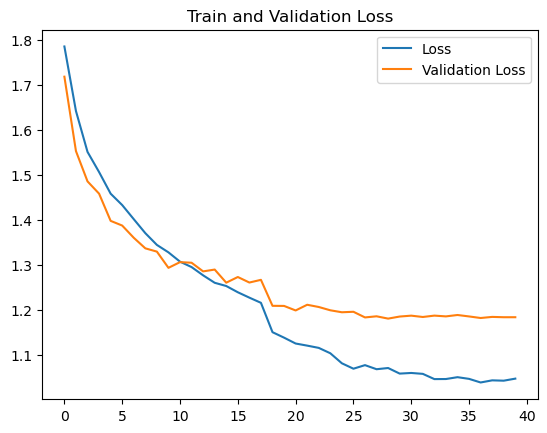

In [7]:
plt.figure()
plt.title('Train and Validation Accuracy')
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.figure()
plt.title('Train and Validation Loss')
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


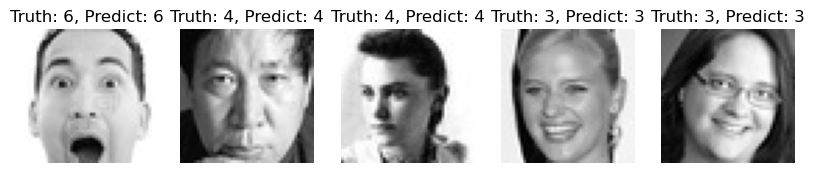

In [8]:
imgs, labels = next(valid_dataset)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for i in range(5):
    image = np.expand_dims(imgs[i], axis=0)
    predict = model.predict(image)[0].argmax()
    label = np.argmax(labels[i], axis=0)
    
    axes[i].imshow(imgs[i], cmap='gray')
    axes[i].set_title(f'Truth: {label}, Predict: {predict}')
    axes[i].axis('off')

plt.show()